In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [185]:
df = pd.read_excel('groceries.xlsx',index=False)
df.to_csv("groceries.csv",index=False,header=None)

In [186]:
df.head(5)


,citrus fruit,semi-finished bread,margarine,ready soups,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31
0,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,whole milk,butter,yogurt,rice,abrasive cleaner,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [189]:
df.shape
df.dtypes

df = df.replace(np.nan, 'NaN', regex=True)
df.head()

,citrus fruit,semi-finished bread,margarine,ready soups,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31
0,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,whole milk,butter,yogurt,rice,abrasive cleaner,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [183]:
#unique items
unique_items = []
for col,row in df.iterrows():
    items_row = list(row.str.split(','))
    for items in items_row:
        for item in items:
            if item not in unique_items:
                unique_items.append(item)
len(unique_items)


170

In [184]:
basket = pd.DataFrame(columns=unique_items)
basket

,tropical fruit,yogurt,coffee,NaN,whole milk,pip fruit,cream cheese,meat spreads,other vegetables,condensed milk,...,baby food,pudding powder,tidbits,whisky,frozen fruits,bags,cooking chocolate,sound storage medium,kitchen utensil,preservation products


In [148]:
for index, row in df.iterrows():
    items = str(row[0]).split(',')
    #print(items)
    one_hot_encoding = np.zeros(len(unique_items),dtype=int)
    for it in items:
        for i,column in enumerate(basket.columns):
            #print(i,column,it)
            if it == column:
                one_hot_encoding[i] = 1
    basket.at[index] = one_hot_encoding

In [149]:
basket

,tropical fruit,yogurt,coffee,NaN,whole milk,pip fruit,cream cheese,meat spreads,other vegetables,condensed milk,...,baby food,pudding powder,tidbits,whisky,frozen fruits,bags,cooking chocolate,sound storage medium,kitchen utensil,preservation products
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9829,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9830,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9831,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9832,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


[Text(0, 0.5, 'Percentage'), Text(0.5, 0, 'margarine')]

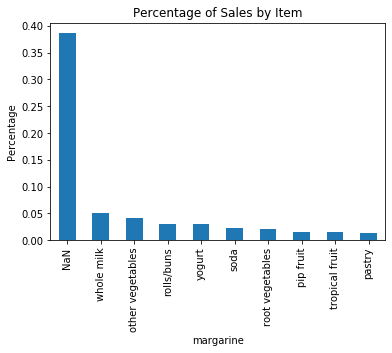

In [150]:
df.margarine.value_counts(normalize=True)[:10].plot(kind="bar", title="Percentage of Sales by Item").set(xlabel="margarine", ylabel="Percentage")

In [176]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

frequent_items = apriori(basket, min_support=0.04, use_colnames=True, verbose=1)

Processing 30 combinations | Sampling itemset size 2


In [177]:
frequent_items

,support,itemsets
0,0.049014,(tropical fruit)
1,0.072910,(whole milk)
2,0.046776,(other vegetables)
3,0.045963,(citrus fruit)
4,0.058979,(frankfurter)
5,0.083893,(sausage)


In [180]:

rules = association_rules(frequent_items, metric='confidence', min_threshold = 0.05)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


        support                                 itemsets
0      0.003152                                      ( )
1      0.000102                                      (-)
2      0.000305                                      (0)
3      0.001220                                      (1)
4      0.001119                                      (2)
...         ...                                      ...
16786  0.000102     (s, e, f,  , a, d, m, -, n, r, i, h)
16787  0.000102     (s, e, f,  , b, d, m, -, n, r, i, h)
16788  0.000102     (s, e, f,  , b, d, a, m, n, r, i, h)
16789  0.000102     (s, e, f, a, b, d, m, -, n, r, i, h)
16790  0.000102  (s, e, f,  , b, d, a, m, -, n, r, i, h)

[16791 rows x 2 columns]


        antecedents                           consequents  antecedent support  \
0               ( )                                   (-)            0.003152   
1               (-)                                   ( )            0.000102   
2               ( )                                   (0)            0.003152   
3               (0)                                   ( )            0.000305   
4               ( )                                   (1)            0.003152   
...             ...                                   ...                 ...   
2236221         (-)  (s, e, f,  , b, d, a, m, n, r, i, h)            0.000102   
2236222         (n)  (s, e, f,  , b, d, a, m, -, r, i, h)            0.003051   
2236223         (r)  (s, e, f,  , b, d, a, m, -, n, i, h)            0.000407   
2236224         (i)  (s, e, f,  , b, d, a, m, -, n, r, h)            0.000305   
2236225         (h)  (s, e, f,  , b, d, a, m, -, n, r, i)            0.000102   

         consequent support

In [181]:
rules[rules['antecedents'] == frozenset(['milk'])]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
